# Salários dos Juízes do TJDFT - 12/2017

Conforme determinação do Conselho Nacional de Justiça - CNJ ([Portaria n. 63, de 17 de agosto de 2017](http://www.cnj.jus.br/busca-atos-adm?documento=3352)) todos os 90 tribunais brasileiros devem disponibilizar as informações de remuneração dos seus magistrados, em cumprimento à lei de Acesso à Informação. Para padronizar a divulgação desses dados o CNJ criou uma planilha Excel padrão, que deve ser preenchida pelos tribunais, e passou a disponibilizar todas as planilhas em seu site ([Remuneraçao dos Magistrados](http://www.cnj.jus.br/transparencia/remuneracao-dos-magistrados)).

Como todas as planilhas são, supostamente, iguais, iremos criar um conjunto de instruções Python para abrir e importar uma planilha, e analisar os dados contidos nela. Além disso, esse Jupyter Notebook servirá como um tutorial introdutório ao uso da biblioteca **pandas** e à análise de dados com Python. Como exemplo usaremos os dados disponibilizados pelo Tribunal de Justiça do Distrito Federal e Territórios - TJDFT, com base na planilha baixada do site do CNJ no dia 07/12/2017.

Usando esse notebook como exemplo e a planilha de outro tibunal, qualquer pessoa deve conseguir realizar as mesmas análises, ou até mesmo expandir o trabalho realizado aqui. Obviamente algum tribunal específico pode descumprir a determinação do CNJ e acabar por disponibilizar seus dados em um formato diferente da planilha padrão. Se isso acontecer, mudanças deverão ser realizadas no código, principalmente na parte intitulada **Importando os dados**.


## Importando os dados

Inicialmente é preciso acessar a página específica do CNJ ([Remuneraçao dos Magistrados](http://www.cnj.jus.br/transparencia/remuneracao-dos-magistrados)) e baixar o arquivo referente ao Tribunal de Justiça do Distrito Federal e Territórios. Coloque o arquivo .xls na mesma pasta do Jupyter Notebook (arquivo .ipynb).

É importante abrir o arquivo .xls no próprio Excel (ou programa similar) para visualizar o arquivo e entender os dados. Ao abrir o arquivo é possível perceber que existem 5 diferentes planilhas, mas os dados principais estão na primeira planilha, chamada **Contracheque**. Além disso percebemos que as primeiras linhas dessa planilha não contêm dados, mas apenas explicações de preenchimento. O cabeçalho das colunas está nas linhas 19 e 20 (mescladas) e os dados começam da linha 21. A forma mais fácil de resolver esse problema é importar as colunas desejadas, sem cabeçalho, e inserir o cabeçalho posteriormente.

Para cada linha temos 17 colunas, a saber: CPF (que não apresenta dados válidos), **Nome**, **Cargo**, **Lotação**, **Subsídio (R\$)**, Direitos Pessoais(1), Indenizações(2), Direitos Eventuais(3), **Total de Rendimentos(4)**, Previdência Pública(5) (R\$), Imposto de Renda(6) (R\$), Descontos Diversos(7) (R\$), Retenção por Teto Constitucional(8) (R\$), Total de Descontos(9), **Rendimento Líquido(10)**, Remuneração do órgão de origem(11) (R\$) e Diárias(12) (R\$). As colunas em negrito correspondem àquelas que iremos tratar em nossa análise.

Os dados serão lidos do arquivo usando as funções das bibliotecas **pandas** e **xlrd**, que permitem importar facilmente uma ou mais planilhas do arquivo Excel, e também permitem a exclusão de linhas indesejadas. Depois de importados, os dados ficarão disponíveis em um **dataframe**.

In [1]:
# Importando a biblioteca pandas
import pandas as pd

# Importando o arquivo xls
# somente a planilha Contracheque -> sheet_name="Contracheque"
# descartando o cabecalho -> header=None
# descartando as 20 primeiras linhas -> skiprows=20
# e importando apenas as colunas selecionados -> usecols=[1, 2, 3, 4, 8, 14]
df = pd.read_excel("Salarios_Juizes_TJDFT_122017.xls", sheet_name="Contracheque", header=None,  skiprows=20, usecols=[1, 2, 3, 4, 8, 14])

# Incluindo o cabecalho para as 5 colunas importadas
df.columns = ["Nome", "Cargo", "Lotacao", "Subsidio", "Rendimento_Bruto", "Rendimento_Liquido"]

# Exibindo os 5 primeiros registros importados
df.head()

Nome                   Cargo  \
0  DELEANE CAMARGO DE SANTANA FERNANDES  JD0001 JUIZ DE DIREITO   
1                          AVAY MIRANDA  JD0001 JUIZ DE DIREITO   
2    EDUARDO ALBERTO DE MORAES OLIVEIRA    DD0001 DESEMBARGADOR   
3                 JOAO DE ASSIS MARIOSI    DD0001 DESEMBARGADOR   
4   JOSE HILARIO BATISTA DE VASCONCELOS    DD0001 DESEMBARGADOR   

                Lotacao  Subsidio  Rendimento_Bruto  Rendimento_Liquido  
0  99000007 APOSENTADOS  28947.55          28947.55            20512.49  
1  99000007 APOSENTADOS  28947.55          34737.06            24052.25  
2  99000007 APOSENTADOS  30471.11          30471.11            21547.71  
3  99000007 APOSENTADOS  30471.11          30471.11            27727.74  
4  99000007 APOSENTADOS  30471.11          30471.11            21495.57

## Analisando os dados

O pacote **pandas** possui um conjunto de métodos que permitem realizar algumas análises em cima dos dados presentes no **dataframe**. Os comentários em cada célula explicam o que faz cada um dos métodos.

In [2]:
# O pandas consegue mostrar um resumo quantitativo dos dados contidos no dataframe
# Isso vale apenas para as colunas que contenham valores numéricos
df.describe()

Subsidio  Rendimento_Bruto  Rendimento_Liquido
count    488.000000        488.000000          488.000000
mean   28859.887131      37489.403279        27700.297869
std     1643.172464       5133.776290         4340.845772
min     4238.570000       4238.570000         4101.620000
25%    28947.550000      34737.060000        27185.252500
50%    28947.550000      39024.730000        28300.710000
75%    28947.550000      39723.730000        29086.280000
max    31167.880000      72106.520000        72031.580000

In [3]:
# Quantos magistrados estão na folha de pagamento do TJDFT?
df.count()

Nome                  488
Cargo                 488
Lotacao               488
Subsidio              488
Rendimento_Bruto      488
Rendimento_Liquido    488
dtype: int64

In [4]:
# É possível contar apenas uma das colunas, fazendo referência direta a
# essa coluna no dataframe e depois executando o método count()
df["Nome"].count() # ou df.Nome.count()

# E também é possível formatar a saída para um texto mais legível
print(f"O TJDFT possui {df.Nome.count()} magistrados")

O TJDFT possui 488 magistrados


In [5]:
# Qual o somatório do salário líquido pago a todos esses magistrados?
df.Rendimento_Liquido.sum()

13517745.36

In [12]:
# Qual a média salarial dos magistrados do TJDFT?
# O valor foi arrendodado para 2 casas decimais
print("Em média, um magistrado do TJDFT recebe R${0:.2f} de salário líquido por mês.".format(df.Rendimento_Liquido.mean()))

Em média, um magistrado do TJDFT recebe R$27700.30 de salário líquido por mês.


In [13]:
# Quais os 5 maiores salários líquidos?
df.nlargest(5, "Rendimento_Liquido")

Nome  \
367       GILMAR DE JESUS GOMES DA SILVA   
291           TATIANA IYKIE ASSAO GARCIA   
240               JAYDER RAMOS DE ARAUJO   
365  MATHEUS STAMILLO SANTARELLI ZULIANI   
198               JULIO ROBERTO DOS REIS   

                                       Cargo  \
367  JS0002 JUIZ DE DIREITO SUBSTITUTO DO DF   
291                   JD0001 JUIZ DE DIREITO   
240                   JD0001 JUIZ DE DIREITO   
365  JS0002 JUIZ DE DIREITO SUBSTITUTO DO DF   
198                   JD0001 JUIZ DE DIREITO   

                                               Lotacao  Subsidio  \
367            11801010000 1A. VARA CIVEL DE CEILANDIA  27500.17   
291  11190010000 VARA DE FAL, REC JUD, INS. CIVIL E...  28947.55   
240            11201100000 10A. VARA CIVEL DE BRASILIA  28947.55   
365  19000012000 NUCLEO PERM DE GESTAO DE METAS DE ...  27500.17   
198            11201300000 25A. VARA CIVEL DE BRASILIA  28947.55   

     Rendimento_Bruto  Rendimento_Liquido  
367          72106.52            72031.58  
291          66841.24            66382.42  
240          52054.72            37851.72  
365          50753.32            36996.16  
198          49051.63            36352.17

In [14]:
# E os 5 menores salários líquidos?
df.nsmallest(5, "Rendimento_Liquido")

Nome  \
358              FABRICIO DORNAS CARATA   
55               ARIEL REY ORTIZ OLSTAN   
54                   JORGE CORREA RIERA   
71                JOSE DE CAMPOS AMARAL   
154  JOSE WELLINGTON MEDEIROS DE ARAUJO   

                                       Cargo               Lotacao  Subsidio  \
358  JS0002 JUIZ DE DIREITO SUBSTITUTO DO DF  99000007 APOSENTADOS   4238.57   
55                    JD0001 JUIZ DE DIREITO  99000007 APOSENTADOS  28947.55   
54                    JD0001 JUIZ DE DIREITO  99000007 APOSENTADOS  16541.45   
71                      DD0001 DESEMBARGADOR  99000007 APOSENTADOS  21765.07   
154                     DD0001 DESEMBARGADOR  99000007 APOSENTADOS  28778.32   

     Rendimento_Bruto  Rendimento_Liquido  
358           4238.57             4101.62  
55           28947.55             5219.31  
54           16541.45            12697.98  
71           21765.07            15878.00  
154          28778.32            19879.70

In [15]:
# Vamos separar os magistrados aposentados constantes na folha de pagamento do TJDFT
# Nesse caso específico, quando o magistrado está aposentado esse termo aparece no campo Lotacao
# Isso pode não ser verdade para os dados de outros tribunais
# Vamos colocar o resultado da nossa seleção em outro dataframe
df_aposentados = df[df.Lotacao.str.contains("APOSENTADOS")]

df_aposentados.head()

Nome                   Cargo  \
0  DELEANE CAMARGO DE SANTANA FERNANDES  JD0001 JUIZ DE DIREITO   
1                          AVAY MIRANDA  JD0001 JUIZ DE DIREITO   
2    EDUARDO ALBERTO DE MORAES OLIVEIRA    DD0001 DESEMBARGADOR   
3                 JOAO DE ASSIS MARIOSI    DD0001 DESEMBARGADOR   
4   JOSE HILARIO BATISTA DE VASCONCELOS    DD0001 DESEMBARGADOR   

                Lotacao  Subsidio  Rendimento_Bruto  Rendimento_Liquido  
0  99000007 APOSENTADOS  28947.55          28947.55            20512.49  
1  99000007 APOSENTADOS  28947.55          34737.06            24052.25  
2  99000007 APOSENTADOS  30471.11          30471.11            21547.71  
3  99000007 APOSENTADOS  30471.11          30471.11            27727.74  
4  99000007 APOSENTADOS  30471.11          30471.11            21495.57

In [16]:
# Qual o número de aposentados na folha de pagamento do TJDFT?
df_aposentados.Nome.count()

101

In [19]:
# Qual o salário médio dos aposentados do TJDFT?
print("No TJDFT um magistrado aposentado recebe, em média, R${0:.2f}".format(df_aposentados.Rendimento_Liquido.mean()))

No TJDFT um magistrado aposentado recebe, em média, R$23288.17


In [20]:
# Quais os maiores salários de magistrados aposentados?
df_aposentados.nlargest(5, "Rendimento_Liquido")

Nome                   Cargo               Lotacao  \
46    AMERICO PEDRO BIANCHINI  JD0001 JUIZ DE DIREITO  99000007 APOSENTADOS   
486    JURACI PEREZ MAGALHAES  JD0001 JUIZ DE DIREITO  99000007 APOSENTADOS   
480    OTAVIO AUGUSTO BARBOSA    DD0001 DESEMBARGADOR  99000007 APOSENTADOS   
13          RONAN ACACIO JACO  JD0001 JUIZ DE DIREITO  99000007 APOSENTADOS   
18   ASDRUBAL NASCIMENTO LIMA    DD0001 DESEMBARGADOR  99000007 APOSENTADOS   

     Subsidio  Rendimento_Bruto  Rendimento_Liquido  
46   28947.55          34737.06            31265.96  
486  28947.55          34737.06            31265.96  
480  30471.11          35992.46            30657.52  
13   30471.11          30471.11            28336.18  
18   30471.11          30471.11            28336.18

In [21]:
# Agora vamos separar os desembargadores constantes na folha de pagamento do TJDFT
# Nesse caso específico, quando o magistrado é desembargador esse termo aparece no campo Cargo
# Isso pode não ser verdade para os dados de outros tribunais
# Vamos colocar o resultado da nossa seleção em outro dataframe
# mas agora devemos ter cuidado para separar apenas os desembargadores que estão na ativa
df_desembargadores = df[(df.Cargo.str.contains("DESEMBARGADOR")) & ~(df.Lotacao.str.contains("APOSENTADOS"))]

df_desembargadores.head()

Nome                 Cargo  \
8         SANDOVAL GOMES DE OLIVEIRA  DD0001 DESEMBARGADOR   
9          ANGELO CANDUCCI PASSARELI  DD0001 DESEMBARGADOR   
10            MARIO-ZAM BELMIRO ROSA  DD0001 DESEMBARGADOR   
12  MARIA DE FATIMA RAFAEL DE AGUIAR  DD0001 DESEMBARGADOR   
14          ROMAO CICERO DE OLIVEIRA  DD0001 DESEMBARGADOR   

                                              Lotacao  Subsidio  \
8    21050000088 GAB. DES. SANDOVAL GOMES DE OLIVEIRA  30471.11   
9     21050000056 GAB. DES. ANGELO CANDUCCI PASSARELI  30471.11   
10       21050000044 GAB. DES. MARIO-ZAM BELMIRO ROSA  30471.11   
12  21050000082 GAB. DESA. MARIA DE FATIMA RAFAEL ...  30471.11   
14     21050000030 GAB. DES. ROMAO CICERO DE OLIVEIRA  30471.11   

    Rendimento_Bruto  Rendimento_Liquido  
8           39024.73            28705.08  
9           42376.55            30713.54  
10          42376.55            30609.27  
12          46348.46            30609.27  
14          42376.55            30609.27

In [22]:
# Qual o número de desembargadores na folha de pagamento do TJDFT?
df_desembargadores.Nome.count()

48

In [25]:
# Qual o salário médio dos desembargadores do TJDFT?
print("No TJDFT um desembargador recebe, em média, R${0:.2f}".format(df_desembargadores.Rendimento_Liquido.mean()))

No TJDFT um desembargador recebe, em média, R$29794.08


In [26]:
# Quais os maiores salários de desembargadores?
df_desembargadores.nlargest(5, "Rendimento_Liquido")

Nome  \
31       MARIO MACHADO VIEIRA NETTO   
266  FLAVIO RENATO JAQUET ROSTIROLA   
25      JOSE JACINTO COSTA CARVALHO   
80             ESDRAS NEVES ALMEIDA   
251           HUMBERTO ADJUTO ULHOA   

                                             Cargo  \
31                 DD0002 DESEMBARGADOR PRESIDENTE   
266                           DD0001 DESEMBARGADOR   
25    DD0006 DESEMBARGADOR SEGUNDO VICE-PRESIDENTE   
80                            DD0001 DESEMBARGADOR   
251  DD0005 DESEMBARGADOR PRIMEIRO VICE-PRESIDENTE   

                                               Lotacao  Subsidio  \
31    21050000028 GAB. DES. MARIO MACHADO VIEIRA NETTO  30471.11   
266  21050000045 GAB. DES. FLAVIO RENATO JAQUET ROS...  30471.11   
25   21050000039 GAB. DES. JOSE JACINTO COSTA CARVALHO  30471.11   
80          21050000089 GAB. DES. ESDRAS NEVES ALMEIDA  30471.11   
251        21050000037 GAB. DES. HUMBERTO ADJUTO ULHOA  30471.11   

     Rendimento_Bruto  Rendimento_Liquido  
31           42461.86            32700.44  
266          42877.89            31733.36  
25           42376.55            31401.41  
80           45517.94            31306.33  
251          42376.55            31306.33

## Plotando gráficos

A biblioteca **pandas** tem integração nativa com a biblioteca **matplotlib**, o que permite a plotagem de Series/DataFrames de forma facilitada. Neste caso, apenas chamamos o método hist() na coluna que queremos produzir o histograma e o gráfico é gerado. É importante customizar o gráfico por meio da biblioteca **matplotlib**, sempre lembrando de rotular os eixos.

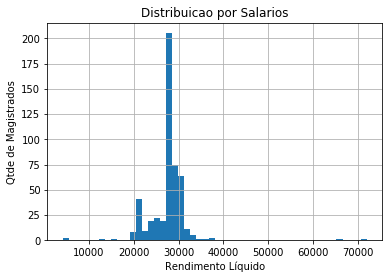

In [27]:
# Importando a biblioteca
import matplotlib.pyplot as plt

# e determinando que os graficos serão desenhados no próprio Jupyter Notebook
%matplotlib inline

# Vamos ver a distribuição dos rendimento líquidos
df.Rendimento_Liquido.hist(bins=50)
plt.title("Distribuicao por Salarios")
plt.ylabel('Qtde de Magistrados')
plt.xlabel('Rendimento Líquido');